In [1]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('MNIST.csv')
data = np.array(data)
np.random.shuffle(data)

In [3]:
m, n = data.shape

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

_, m_train = X_train.shape

In [4]:
data_train.shape

(785, 41000)

In [5]:
def init_params(input, hidden, output, bias = 1):
    W1 = np.random.rand(hidden, input) - 0.5
    b1 = np.random.rand(hidden, bias) - 0.5
    W2 = np.random.rand(output, hidden) - 0.5
    b2 = np.random.rand(output, bias) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_prime(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# def sig(Z):
#     A = 1 / (1 + sum(np.exp(-Z)))
#     return A

# def sig_prime(Z):
#     A = sig(Z) * (1 - sig(Z))
#     return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)

    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1).reshape(-1, 1)

    dZ1 = W2.T.dot(dZ2) * ReLU_prime(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1).reshape(-1, 1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1

    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2


In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return round((np.sum(predictions == Y) / Y.size) * 100, 2)

def gradient_decent(X, Y, epochs, alpha):
    W1, b1, W2, b2 = init_params(784, 200, 10) #ONLY CHANGE HIDDEN LAYER!!!!

    for e in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if e % 10 == 0:
            print("Epoch:", e)
            print("Accuracy:", get_accuracy(get_predictions(A2), Y), "%")

    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_decent(X_train, Y_train, 1000, 0.05)

Epoch: 0
Accuracy: 10.5 %
Epoch: 10
Accuracy: 40.15 %
Epoch: 20
Accuracy: 55.18 %
Epoch: 30
Accuracy: 63.13 %
Epoch: 40
Accuracy: 67.98 %
Epoch: 50
Accuracy: 71.07 %
Epoch: 60
Accuracy: 73.47 %
Epoch: 70
Accuracy: 75.25 %
Epoch: 80
Accuracy: 76.54 %
Epoch: 90
Accuracy: 77.7 %
Epoch: 100
Accuracy: 78.74 %
Epoch: 110
Accuracy: 79.54 %
Epoch: 120
Accuracy: 80.27 %
Epoch: 130
Accuracy: 80.96 %
Epoch: 140
Accuracy: 81.48 %
Epoch: 150
Accuracy: 82.05 %
Epoch: 160
Accuracy: 82.52 %
Epoch: 170
Accuracy: 82.99 %
Epoch: 180
Accuracy: 83.34 %
Epoch: 190
Accuracy: 83.69 %
Epoch: 200
Accuracy: 83.99 %
Epoch: 210
Accuracy: 84.35 %
Epoch: 220
Accuracy: 84.64 %
Epoch: 230
Accuracy: 84.89 %
Epoch: 240
Accuracy: 85.09 %
Epoch: 250
Accuracy: 85.3 %
Epoch: 260
Accuracy: 85.53 %
Epoch: 270
Accuracy: 85.78 %
Epoch: 280
Accuracy: 86.0 %
Epoch: 290
Accuracy: 86.18 %
Epoch: 300
Accuracy: 86.34 %
Epoch: 310
Accuracy: 86.52 %
Epoch: 320
Accuracy: 86.69 %
Epoch: 330
Accuracy: 86.82 %
Epoch: 340
Accuracy: 86.98 %


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_results(idx, W1, b1, W2, b2):
    curr_img = X_train[:, idx, None]
    prediction = make_predictions(X_train[:, idx, None], W1, b1, W2, b2)
    label = Y_train[idx]

    print('Prediction:', prediction)
    print('actual:', label)

    curr_img = curr_img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(curr_img)
    plt.show()

Prediction: [7]
actual: 9


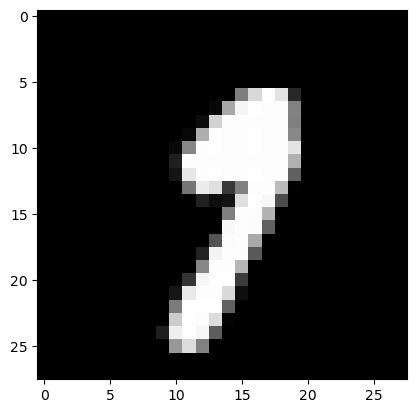

Prediction: [7]
actual: 7


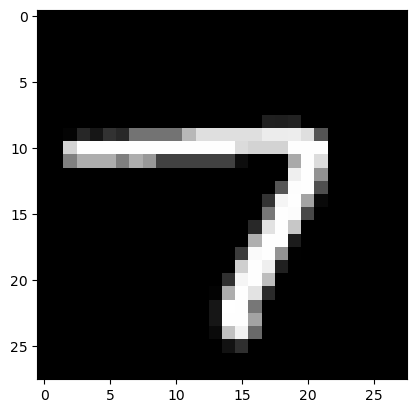

In [14]:
test_results(np.random.randint(0, Y_train.size), W1, b1, W2, b2)
test_results(np.random.randint(0, Y_train.size), W1, b1, W2, b2)


In [15]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

90.9